In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.metrics import pairwise

from scipy.spatial import distance
from scipy.spatial.distance import squareform

%matplotlib notebook

In [121]:
#Lightcurve data
data = pd.read_pickle('preFFT_dataset_09_10_19.dat')
durationdata = pd.read_pickle("all_GRBs_with_T90_time.dat")
durationdata.head()

,GRBname,T90
0,GRB190829A,56.896
1,GRB190828B,715.856
2,GRB190824A,169.360
3,GRB190821A,57.096
4,GRB190816A,375.760


In [27]:
data.head()

,GRBname,T100,0,1,2,3,4,5,6,7,...,61222,61223,61224,61225,61226,61227,61228,61229,61230,61231
0,GRB041217,7.064,42263,25974.4,49178.6,62319.3,3862.22,39591.4,21523.5,42969.1,...,0,0,0,0,0,0,0,0,0,0
1,GRB041219B,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,GRB041219C,12,44786.7,11646.8,-32126.9,58827,49515.5,21555.2,21976.5,10252.2,...,0,0,0,0,0,0,0,0,0,0
3,GRB041220,7.02,61112,119694,32482.2,99854.5,133366,72094.3,137125,127480,...,0,0,0,0,0,0,0,0,0,0
4,GRB041223,156.48,1686.61,953.54,-205.339,1087.29,188.042,-1470.78,-695.306,998.237,...,0,0,0,0,0,0,0,0,0,0


In [41]:
too_short_GRBs = ['GRB070810B', 'GRB090417A', 'GRB110420B', 'GRB150101A','GRB180718A', 'GRB190326A'] + \
['GRB050509B', 'GRB070923', 'GRB090515', 'GRB100628A', 'GRB130822A','GRB150101B', 'GRB170112A'] #1 value GRBS and GRBs with t100<64ms
# data = data.loc[data.GRBname.isin(too_short_GRBs).apply(lambda x: not(x))].reset_index(drop=True)

In [177]:
dims = np.arange(61231)
for i, b in enumerate(data.iloc[916].T.iloc[3:]!= 0):
    if b:
        print(i,data.iloc[916,i+3])

15307 300165986.2724867
30615 256081000.7313081
45923 47720875.31945771


In [145]:
wgrb = (data.loc[data.GRBname.isin(['GRB150101B'])].iloc[:,3:])!=0

In [14]:
discardable = np.sum(data.iloc[:,3:],axis=1) == 0

In [13]:
cleandata = data.loc[discardable.apply(lambda x: not(x))].reset_index(drop=True)

In [15]:
GRBnames = cleandata.pop('GRBname')
T100 = cleandata.pop('T100')
# durationdata.set_index("GRBname", drop = True, inplace = True)
# T90 = durationdata.pop("T90")

# #Redshift data
# redshift = pd.read_csv("Summary_files/summary_redshift.txt",comment= '#',sep = '|',header=None)
# redshift.iloc[:,0] = redshift.iloc[:,0].str.strip()
# redshift = redshift.iloc[:,:2]
# redshift.iloc[:,1] = pd.to_numeric(redshift.iloc[:,1],errors='coerce')
# redshift = redshift.dropna(subset=[1])[::-1]

In [22]:
data = data[T100>64e-3].reset_index(drop=True)
GRBnames = GRBnames[T100>64e-3].reset_index(drop=True)
T100 = T100[T100>64e-3].reset_index(drop=True)

# z = np.zeros(len(GRBnames))
# # z = np.log(z)
# z[GRBnames.isin(redshift[0])] = redshift.loc[redshift.iloc[:,0].isin(GRBnames),1]

NameError: name 'T100' is not defined

In [17]:
#retter i fluence for GRB190718A 
PL_fluence = 8.030311e-28 #Har det indflydelse på Hardness? Jeg har ikke taget højde for det, men jeg ser ikke nogle ekstreme værdier
CPL_fluence = 7.200000e+02
cleandata[GRBnames.isin(['GRB190718A'])] = cleandata[GRBnames.isin(['GRB190718A'])]*PL_fluence/CPL_fluence

In [37]:
ftdata = pd.concat([GRBnames,T100,pd.DataFrame(ft)],axis=1)

In [120]:
cleandata.loc[GRBnames.isin(['GRB150101B'])]

,0,1,2,3,4,5,6,7,8,9,...,61222,61223,61224,61225,61226,61227,61228,61229,61230,61231
892,1.206138e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# ftdata.to_pickle('ftdata_09_10_19.dat')

In [32]:
ft = np.fft.rfft(cleandata)

In [39]:
# emb = TSNE(perplexity=30, n_iter=15000,verbose = 2,random_state = 809337339).fit_transform(abs(ft))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1268 samples in 3.230s...
[t-SNE] Computed neighbors for 1268 samples in 105.499s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1268
[t-SNE] Computed conditional probabilities for sample 1268 / 1268
[t-SNE] Mean sigma: 15054952.057320
[t-SNE] Computed conditional probabilities in 0.507s
[t-SNE] Iteration 50: error = 67.5208588, gradient norm = 0.2263506 (50 iterations in 1.076s)
[t-SNE] Iteration 100: error = 65.1153259, gradient norm = 0.2027010 (50 iterations in 0.836s)
[t-SNE] Iteration 150: error = 65.2044983, gradient norm = 0.1959071 (50 iterations in 0.932s)
[t-SNE] Iteration 200: error = 65.3420334, gradient norm = 0.1865385 (50 iterations in 0.816s)
[t-SNE] Iteration 250: error = 65.2489166, gradient norm = 0.1717672 (50 iterations in 0.745s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.248917
[t-SNE] Iteration 300: error = 1.1485000, gradient norm = 0.0012716 (50 iterations i

[t-SNE] Iteration 4150: error = 1.0542467, gradient norm = 0.0000278 (50 iterations in 0.677s)
[t-SNE] Iteration 4200: error = 1.0542558, gradient norm = 0.0000172 (50 iterations in 0.679s)
[t-SNE] Iteration 4250: error = 1.0542916, gradient norm = 0.0000239 (50 iterations in 0.683s)
[t-SNE] Iteration 4300: error = 1.0542611, gradient norm = 0.0000161 (50 iterations in 0.680s)
[t-SNE] Iteration 4350: error = 1.0542735, gradient norm = 0.0000275 (50 iterations in 0.686s)
[t-SNE] Iteration 4400: error = 1.0543321, gradient norm = 0.0000235 (50 iterations in 0.685s)
[t-SNE] Iteration 4450: error = 1.0543642, gradient norm = 0.0000248 (50 iterations in 0.688s)
[t-SNE] Iteration 4500: error = 1.0542814, gradient norm = 0.0000221 (50 iterations in 0.691s)
[t-SNE] Iteration 4500: did not make any progress during the last 300 episodes. Finished.
[t-SNE] KL divergence after 4500 iterations: 1.054281


In [ ]:
# pd.concat([GRBnames,T100,pd.DataFrame(emb)],axis=1).to_pickle('perp5_embedding.dat')

In [6]:
emb = pd.read_pickle('embedding.dat')
GRBnames = emb.pop('GRBname')
T100 = emb.pop('T100')
emb = np.array(emb)
bestfit = pd.read_pickle('CPL_better.dat')
bestfit = bestfit.reset_index()
bestfit = bestfit.loc[bestfit.iloc[:,0].isin(GRBnames)]
bestfit = bestfit[::-1].reset_index(drop=True)
T90_Color = T90[GRBnames]

In [44]:
T90 = pd.read_pickle('all_GRBs_with_T90_time.dat')

In [104]:
# pd.read_pickle('ftdata_09_10_19.dat')

In [75]:
T90_Color = T90.loc[T90.GRBname.isin(GRBnames)].iloc[::-1,1].reset_index(drop=True)

In [62]:
# T90_Color = T90.loc[T90.GRBname.isin(GRBnames)].T90.reset_index(drop=True)

In [83]:
newGRBs = ['GRB190829A','GRB190828B','GRB190824A','GRB190821A','GRB190816A']

In [100]:
GRBnames.loc[GRBnames.isin(newGRBs)]
GRBnames.iloc[-5:]

1263    GRB190816A
1264    GRB190821A
1265    GRB190824A
1266    GRB190828B
1267    GRB190829A
Name: GRBname, dtype: object

In [76]:
# short_grbs = []
def clicker(event):
    indeces = event.ind
    ax.set_title(str(GRBnames.iloc[indeces].values))    
    selected_points.set_offsets(emb[indeces])
    
#     short_grbs.append(GRBnames[indeces].values)
    
    return

<IPython.core.display.Javascript object>


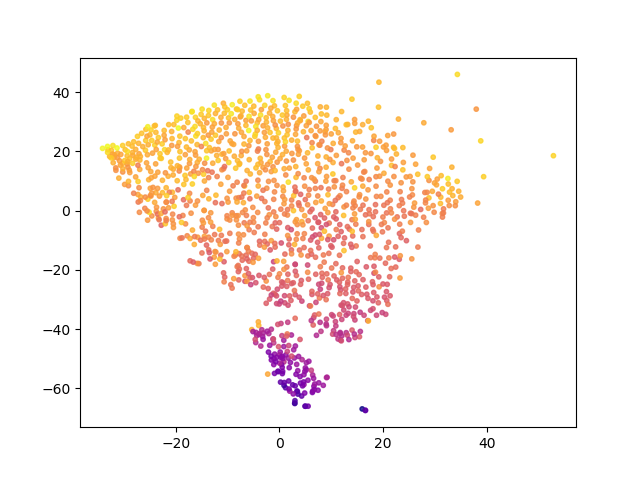

In [200]:
#Måske skal vi gemme koden, der gør andre ting. Det her er til z-plottet. Så kan vi rydde op i det senere.

fig, ax = plt.subplots()
fig.canvas.mpl_connect('pick_event',clicker)

# selected_points = ax.scatter([],[],c='k',alpha=0.8,s=10,zorder=10)
embedding = ax.scatter(emb[:,1],emb[:,0],c=np.log10(T90_Color),cmap='plasma',picker=True,alpha=0.8,s=10)
# newgrbs = ax.scatter(emb[-1:,1],emb[-1:,0],c='k')
# GRB = ['GRB060605']
# ax.scatter(emb[GRBnames.isin(GRB),0],emb[GRBnames.isin(GRB),1],alpha=1,s=10,c='g',zorder=10)

# korte_grbs = ax.scatter(emb[GRBnames.isin(sgrbs),0],emb[GRBnames.isin(sgrbs),1],alpha=1,s=10,c='#d95f02')
# korte_grbs = ax.scatter(emb[GRBnames.isin(sgrbs).apply(lambda x:not(x)),0],emb[GRBnames.isin(sgrbs).apply(lambda x:not(x)),1],alpha=1,s=10,c='#7570b3')

# ax.scatter(emb[:,0],emb[:,1],c='grey',picker=True,alpha=0.6,s=10)
# def zero_or_hero(x):
#     if x:
#         return x
#     else:
#         return None
# emb_back = ax.scatter(emb[:, 0], emb[:,1], c= 'gray', s= 10, alpha = 0.3)
# embedding = ax.scatter(emb[:,0],emb[:,1],c= pd.Series(z).apply(zero_or_hero),cmap='rainbow',s=10,alpha=0.8)#,edgecolor='k',linewidths=0.2)

# extended_emission = ['GRB050709','GRB061217','GRB050509B','GRB060801','GRB070724A','GRB070429B','GRB051221A','GRB060121','GRB050724','GRB061006','GRB061210','GRB070714B']
# ax.scatter(emb[GRBnames.isin(extended_emission),0],emb[GRBnames.isin(extended_emission),1])

selected_points = ax.scatter([],[],c='k',marker='x')
# caxis = fig.add_axes([0.125, 0.885, 0.775, 0.035])
# cbar = plt.colorbar(mappable=embedding, ax=ax,cax=caxis,orientation = 'horizontal')
# ax.tick_params(length=0,labelbottom=False,labelleft=False)
# cbar.set_label('$\logT_{90}$',labelpad= -35)
# caxis.tick_params(top=True,bottom=False,labeltop=True,labelbottom=False,direction='in',length=6,pad=0)

# grb = ['GRB060313']
# ax.scatter(emb[GRBnames.isin(grb),0],emb[GRBnames.isin(grb),1],marker='x',c='k',s=3)
# fig.savefig("T90_main_plot.svg")

<IPython.core.display.Javascript object>


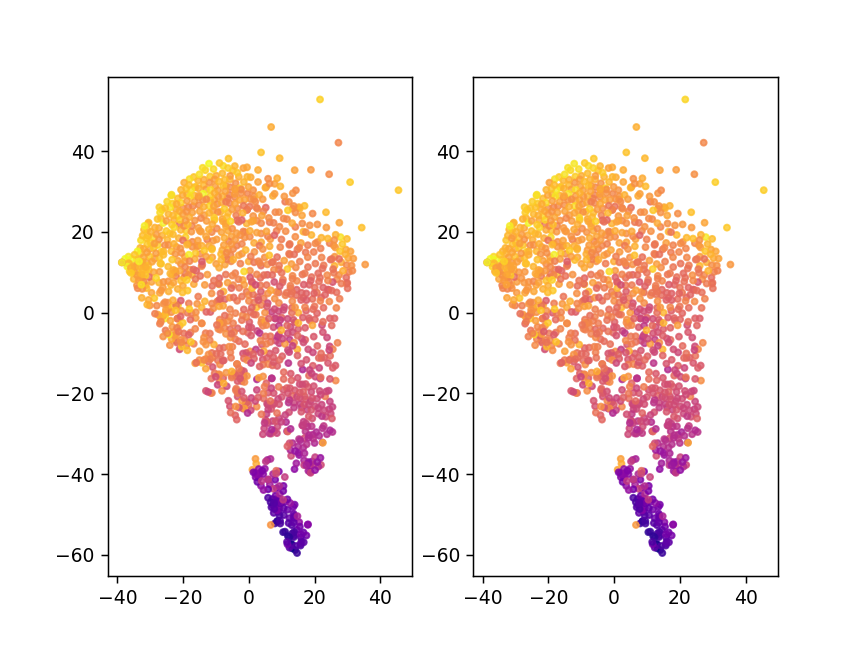

In [25]:
fig, ax = plt.subplots(ncols = 2)
# fig.canvas.mpl_connect('pick_event',clicker)

selected_points = ax[0].scatter([],[],c='k',alpha=0.8,s=10,zorder=10)
embedding = ax[0].scatter(emb[:,0],emb[:,1],c=np.log10(T100),cmap='plasma',picker=True,alpha=0.8,s=10)

selected_points = ax[1].scatter([],[],c='k',alpha=0.8,s=10,zorder=10)
embedding = ax[1].scatter(emb[:,0],emb[:,1],c=np.log10(T90_Color),cmap='plasma',picker=True,alpha=0.8,s=10)

In [110]:
GRBnames[GRBnames.isin(['GRB190829A'])]

1267    GRB190829A
Name: GRBname, dtype: object

In [113]:
interesting

{'SN': ['GRB060218A',
  'GRB071112C',
  'GRB111209A',
  'GRB100316D',
  'GRB111228A',
  'GRB120729A',
  'GRB120714B',
  'GRB130215A',
  'GRB130831A',
  'GRB161219B',
  'GRB171010A',
  'GRB190829A'],
 'UnclearSN': ['GRB060505', 'GRB060614', 'GRB080517', 'GRB111005A'],
 'KN': ['GRB130603B'],
 'UnclearKN': ['GRB050709', 'GRB150101B', 'GRB160821B'],
 'Name': ['GRB060505', 'GRB060614', 'GRB130603B', 'GRB111209A']}

In [114]:
interesting = pd.read_pickle("interestingbursts.p")
interesting['SN'][-1] = 'GRB190829A'
interesting['Name'].append('GRB111209A')
SN_index = GRBnames.isin(['GRB060218A', 'GRB021112C', 'GRB100316D', 'GRB111209A', 'GRB111228A', 'GRB120714B', 'GRB120729A', 'GRB130215A', 'GRB130831A', 'GRB161219B', 'GRB171010A', 'GRB190829A'])#interesting['SN'])
UnSN_index = GRBnames.isin(interesting['UnclearSN'])
KN_index = GRBnames.isin(interesting['KN'])
UnKN_index = GRBnames.isin(interesting['UnclearKN'])
names = {i:GRBnames.isin([i]) for i in interesting['Name']}
GRBnames.loc[SN_index]

477     GRB100316D
615     GRB111209A
620     GRB111228A
664     GRB120714B
668     GRB120729A
718     GRB130215A
774     GRB130831A
1054    GRB161219B
1267    GRB190829A
Name: GRBname, dtype: object

In [102]:
# names

In [97]:
GRBnames.loc[GRBnames.isin(['GRB050509B'])]

Series([], Name: GRBname, dtype: object)

<IPython.core.display.Javascript object>


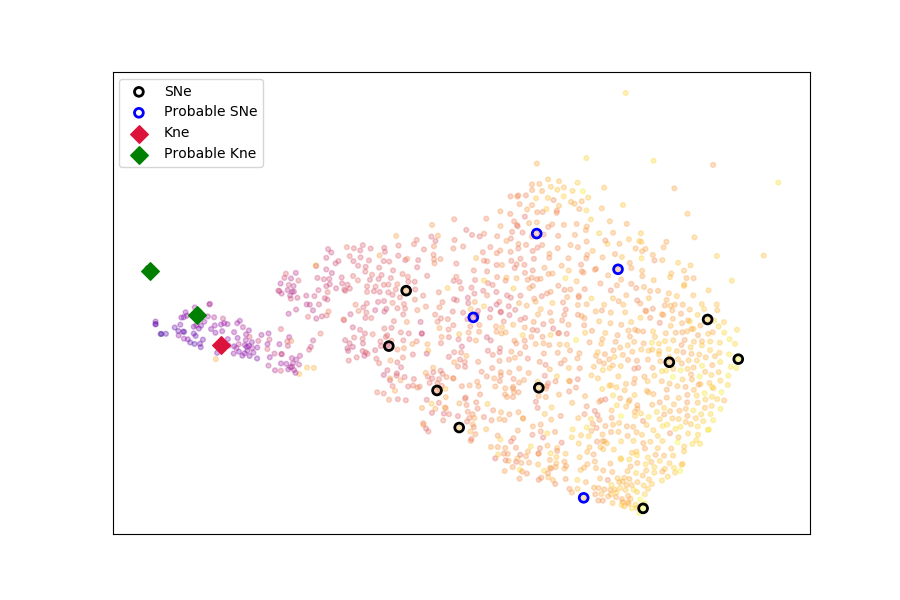

In [212]:
%matplotlib notebook
#Måske skal vi gemme koden, der gør andre ting. Det her er til z-plottet. Så kan vi rydde op i det senere.
fig, ax = plt.subplots(figsize = (9, 6))
# fig.canvas.mpl_connect('pick_event',clicker) # Hvis vi skal bruge en clicker
# emb = pd.read_pickle("perp5_embedding.dat")
embedding = ax.scatter(emb[:,0],emb[:,1],c=np.log10(T90_Color),picker=True,alpha=0.3,s=12, cmap = 'plasma')
scat_SN = ax.scatter(emb[SN_index,0 ], emb[SN_index, 1], s = 40, marker = 'o', facecolors = 'none', edgecolor = 'k', label = 'SNe', alpha = 1, linewidths = 2)
scat_SN = ax.scatter(emb[UnSN_index,0 ], emb[UnSN_index, 1], s = 40, marker = 'o', facecolors = 'none', edgecolor = 'blue', label = 'Probable SNe', alpha = 1, linewidths = 2)
scat_KN = ax.scatter(emb[KN_index,0 ], emb[KN_index, 1], s = 80, marker = 'D', color = 'crimson', label = 'Kne', alpha = 1)
scat_KN = ax.scatter(emb[UnKN_index,0 ], emb[UnKN_index, 1], s = 80, marker = 'D', color = 'green', label = 'Probable Kne', alpha = 1)
ax.tick_params(length=0,labelbottom=False,labelleft=False)
# ax.scatter(-emb[144,0],emb[144,1],s = 50, color = 'k',marker='x')
scat_individual = []
# for name, ind, c in zip(names.keys(), names.values(), ['r', 'g', 'b', 'magenta']):
#     scat_individual.append(ax.scatter(emb[ind, 0], emb[ind, 1], s = 50, marker = '*', color = c, label = name))
plt.legend()
# plt.xlim(-200, 250)
# plt.ylim(-200, 150)
# plt.savefig("Perp_5_marked_interesting.eps")
# plt.savefig("Figure_4_top.svg")

In [36]:
# fig.savefig("redshift_colored_embedding.eps")

In [56]:
# fig.savefig('klassficering_sGRB_kandidater.pdf')

In [31]:
sgrbs = pd.read_pickle("our_short_GRBs.dat")
tid_lange = T100.loc[GRBnames.isin(sgrbs).apply(lambda x:not(x))]
name_lange = GRBnames.loc[GRBnames.isin(sgrbs).apply(lambda x:not(x))]
tid_korte = T100.loc[GRBnames.isin(sgrbs)]
name_korte = GRBnames.loc[GRBnames.isin(sgrbs)]
long_GRBs = pd.concat([name_lange, tid_lange], axis = 1)
long_GRBs.to_pickle("our_long_GRBs_with_time.dat")
short_GRBs = pd.concat([name_korte, tid_korte], axis = 1)
short_GRBs.to_pickle("our_short_GRBs_with_time.dat")

In [43]:
# tid_lange = T100.loc[GRBnames.isin(sgrbs).apply(lambda x:not(x))].apply(np.log10)
# tid_korte = T100.loc[GRBnames.isin(sgrbs)].apply(np.log10)
tid_lange = T90[GRBnames[GRBnames.isin(sgrbs).apply(lambda x: not(x))]].apply(np.log10)
tid_korte = T90[GRBnames[GRBnames.isin(sgrbs)]].apply(np.log10)

<IPython.core.display.Javascript object>


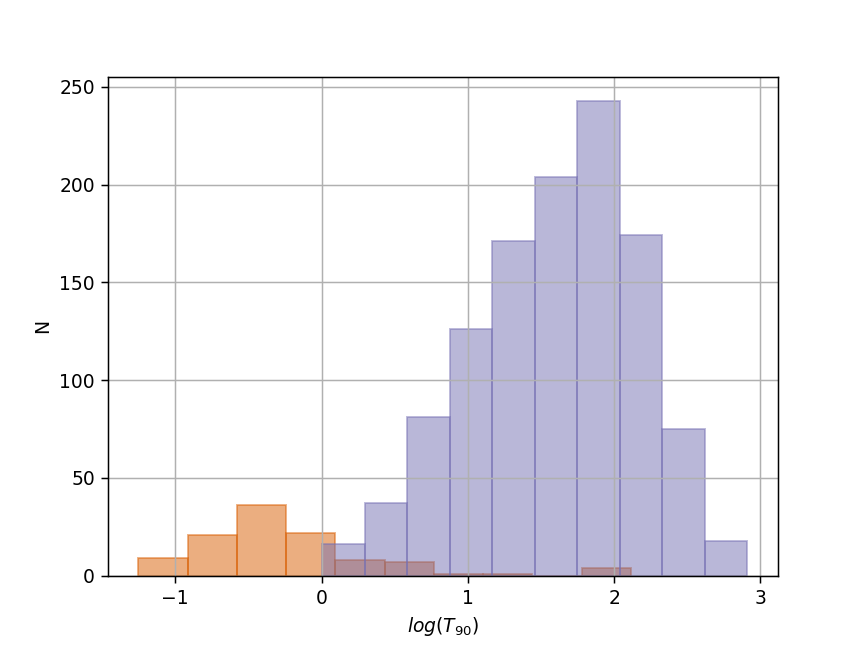

Text(0.5, 0, '$log(T_{90})$')

In [44]:
plt.figure(0)
tid_korte.hist(alpha=0.5,color='#d95f02',edgecolor='#d95f02')
tid_lange.hist(alpha=0.5,color='#7570b3',edgecolor='#7570b3')
plt.ylabel('N')
plt.xlabel('$log(T_{90})$')

In [45]:
plt.savefig('Histogram_T90_sGRB_kandidater.pdf')

<IPython.core.display.Javascript object>


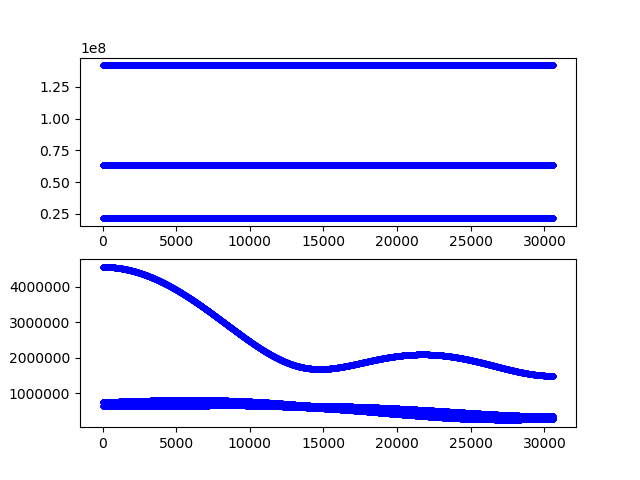

In [198]:
fig1,ax1 = plt.subplots(2)
# ax1[0].tick_params(length=0,labelbottom=False,labelleft=False)
# lc_grb1 = pd.read_csv('BAT_lc/GRB140716A-1_lc.dat',sep = ' ')
# lc_grb2 = pd.read_csv('BAT_lc/GRB140716A-2_lc.dat',sep = ' ')
# ax1[0].plot(lc_grb1.iloc[:,0],lc_grb1.iloc[:,9])
# ax1[1].plot(lc_grb2.iloc[:,0],lc_grb2.iloc[:,9])

ind = np.argmax(GRBnames.isin(['GRB150101A']))
ind2 = np.argmax(GRBnames.isin(['GRB160624A']))

ax1[0].plot(abs(ft)[ind],'b.')
ax1[1].plot(abs(ft)[ind2],'b.')

In [29]:
pd.read_pickle('Category_of_GRBs').loc['GRB060605']

T100    85.276
Cat       Long
Name: GRB060605, dtype: object